In [8]:
def find_brute(T, P):
	n, m = len(T), len(P)
	for i in range(n - m + 1):
		k = 0
		while k < m and T [i + k] == P [k]:
			k += 1
		if k == m:
			return i
	return -1

In Brute force algorithm, we compare each character from test string
with each character from test string. So to compare test string of length `n`
we will have to compare at least `n` characters from test string to pattern.

Now the time complexity of brute force is `O(n*p)` where n is length test string
and `p` is length of pattern.

Now the best case scenario can be any one of the following:
- length of test string is 1
- length of pattern is 1
- pattern is just one character and input string is replication of the pattern

```text
pattern = "K"
test_string = "KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK"
```

### Problem 1.2: Python’s str class and pattern-matching

In [33]:
"""
# Docstring.
"""
# Python Modules
import time
from random import choice, seed

# 3rd Party Modules
# -N/A

# Project Modules
# -N/A

# Global Vars
# set random seed so you will always get the same random_string
seed(100)
generate_random_strings = lambda letters, size: ''.join(
	choice(letters) for i in range(size)
)


def perform_experiment(func):
	def inner_call(*arg, **kargs):
		start_time = time.time()
		return_value = func(*arg, **kargs)
		end_time = time.time()
		total_time = end_time - start_time
		return total_time,
		return_value.get("all_occurrences"),
		return_value.get("total_comparisons"), len(arg [0]),
		len(arg [1])


return inner_call

letter_set = string.ascii_letters

data_size = [i for i in range(0, 7)]

#### 1.2.1. Modify the brute-force pattern-matching to return non-overlapping occurrences of a P within D.

In [34]:

@perform_experiment
def find_brute(T, P):
	n, m = len(T), len(P)
	all_occurrences = 0
	total_comparisons = 0
	# every starting position
	i = 0
	while i < (n - m) + 1:
		k = 0
		# conduct O(k) comparisons
		while k < m and T [i + k] == P [k]:
			total_comparisons += 1
			k += 1
		if k == m:
			all_occurrences += 1
			i = i + k
		i = i + 1
	return {
		"all_occurrences": all_occurrences,
		"total_comparisons": total_comparisons
	}


total_comparisons_brute = []
execution_times_brute = []

for i in range(0, 7):
	random_string = generate_random_strings(letter_set, 10 ** i)
	pattern = generate_random_strings("ATGC", 100)
	# append pattern to the end of string
	test_string = random_string + pattern
	values = find_brute(test_string, pattern)
	execution_time = values [0]
	total_matches = values [1]
	total_comparison = values [2]
	execution_times_brute.append(execution_time)
	total_comparisons_brute.append(total_comparison)

## Problem 2: Experimental Analysis of Pattern-Matching Algorithms

### Brute Force
- Number of character comparison
- Relative speed comparison

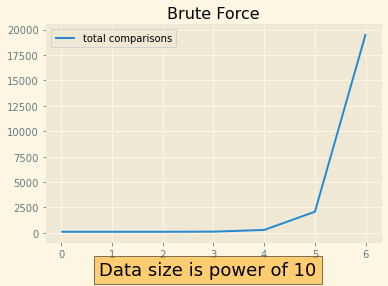

In [35]:
with plt.style.context('Solarize_Light2'):
	plt.plot(data_size, total_comparisons_brute, label="total comparisons",
	         linestyle="-"
	         )
	plt.figtext(0.5, 0.01, "Data size is power of 10", ha="center",
	            fontsize=18,
	            bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}
	            )
	plt.title('Brute Force')
	plt.legend()
	plt.show()


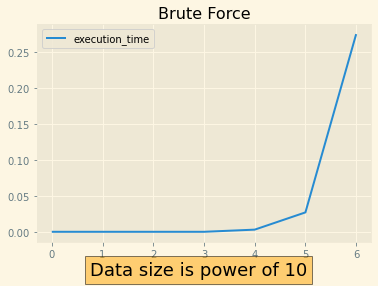

In [36]:
with plt.style.context('Solarize_Light2'):
	plt.plot(data_size, execution_times_brute, label="execution_time",
	         linestyle="-"
	         )
	plt.figtext(0.5, 0.01, "Data size is power of 10", ha="center",
	            fontsize=18,
	            bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}
	            )
	plt.title('Brute Force')
	plt.legend()
	plt.show()

#### 1.2.2. Modify the Boyer_moore pattern-matching to return non-overlapping occurrences of a P within D.

In [37]:
total_comparisons_bm = []
execution_times_bm = []


# Boyer-Moore
@perform_experiment
def find_boyer_moore(T, P):
	all_occurrences = 0
	total_comparisons = 0
	n, m = len(T), len(P)
	if m == 0:
		return 0
	last = {}
	for k in range(m):
		last [P [k]] = k
	i = m - 1
	k = m - 1
	while i < n:
		# If matched, decrease i,k
		if T [i] == P [k]:
			if k == 0:
				all_occurrences += 1
				k = m - 1
				i += 2 * k
			else:
				i -= 1
				k -= 1
		# Not match, reset the positions
		else:
			j = last.get(T [i], -1)
			i += m - min(k, j + 1)
			k = m - 1
		total_comparisons += 1
	return {
		"all_occurrences": all_occurrences,
		"total_comparisons": total_comparisons
	}


for i in range(0, 7):
	random_string = generate_random_strings(letter_set, 10 ** i)
	pattern = generate_random_strings("ATGC", 100)
	# append pattern to the end of string
	test_string = random_string + pattern
	values = find_boyer_moore(test_string, pattern)
	execution_time = values [0]
	total_matches = values [1]
	total_comparison = values [2]
	execution_times_bm.append(execution_time)
	total_comparisons_bm.append(total_comparison)

## Problem 2: Experimental Analysis of Pattern-Matching Algorithms

### Boyre Moore
- Number of character comparison
- Relative speed comparison

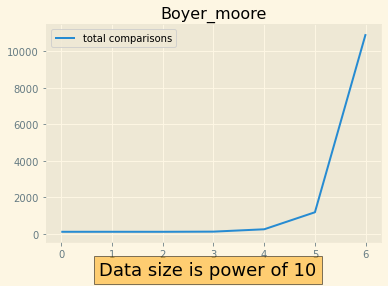

In [38]:
with plt.style.context('Solarize_Light2'):
	plt.plot(data_size, total_comparisons_bm, label="total comparisons",
	         linestyle="-"
	         )
	plt.figtext(0.5, 0.01, "Data size is power of 10", ha="center",
	            fontsize=18,
	            bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}
	            )
	plt.title('Boyer_moore')
	plt.legend()
	plt.show()


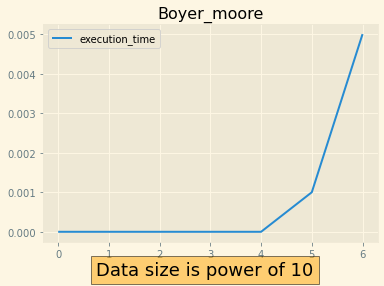

In [39]:
with plt.style.context('Solarize_Light2'):
	plt.plot(data_size, execution_times_bm, label="execution_time",
	         linestyle="-"
	         )
	plt.figtext(0.5, 0.01, "Data size is power of 10", ha="center",
	            fontsize=18,
	            bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}
	            )
	plt.title('Boyer_moore')
	plt.legend()
	plt.show()

#### 1.2.3. Modify the KMP pattern-matching to return non-overlapping occurrences of a P within D.

In [40]:
total_comparisons_kmp = []
execution_times_kmp = []


# KMP failure function
def compute_kmp_fail(P):
	m = len(P)
	fail = [0] * m
	j = 1
	k = 0
	while j < m:
		if P [j] == P [k]:
			fail [j] = k + 1
			j += 1
			k += 1
		elif k > 0:
			k = fail [k - 1]
		else:
			j += 1
	return fail


# KMP
@perform_experiment
def find_kmp(T, P):
	all_occurrences = 0
	total_comparisons = 0
	n, m = len(T), len(P)
	if m == 0:
		return 0
	fail = compute_kmp_fail(P)
	j = 0
	k = 0
	while j < n:
		if T [j] == P [k]:
			if k == m - 1:
				all_occurrences += 1
				k = -1
			j += 1
			k += 1
		elif k > 0:
			k = fail [k - 1]
		else:
			j += 1
		total_comparisons += 1
	return {
		"all_occurrences": all_occurrences,
		"total_comparisons": total_comparisons
	}


for i in range(0, 7):
	random_string = generate_random_strings(letter_set, 10 ** i)
	pattern = generate_random_strings("ATGC", 100)
	# append pattern to the end of string
	test_string = random_string + pattern
	values = find_kmp(test_string, pattern)
	execution_time = values [0]
	total_matches = values [1]
	total_comparison = values [2]
	execution_times_kmp.append(execution_time)
	total_comparisons_kmp.append(total_comparison)

## Problem 2: Experimental Analysis of Pattern-Matching Algorithms

### KMP 
- Number of character comparison
- Relative speed comparison

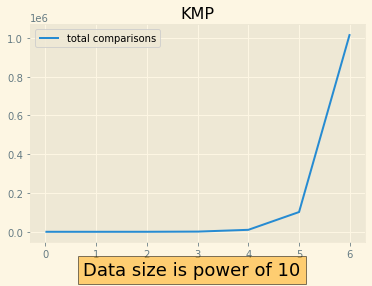

In [41]:
with plt.style.context('Solarize_Light2'):
	plt.plot(data_size, total_comparisons_kmp, label="total comparisons",
	         linestyle="-"
	         )
	plt.figtext(0.5, 0.01, "Data size is power of 10", ha="center",
	            fontsize=18,
	            bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}
	            )
	plt.title('KMP')
	plt.legend()
	plt.show()


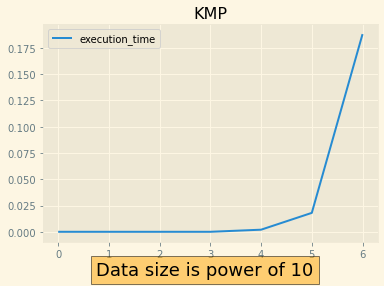

In [42]:
with plt.style.context('Solarize_Light2'):
	plt.plot(data_size, execution_times_kmp, label="execution_time",
	         linestyle="-"
	         )
	plt.figtext(0.5, 0.01, "Data size is power of 10", ha="center",
	            fontsize=18,
	            bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}
	            )
	plt.title('KMP')
	plt.legend()
	plt.show()

## Problem 3: Matrix-chain Multiplication

### The matrix-chain multiplication problem: Given a chain of < D1,D2, . . . ,Dn > of n matrices fully parenthesize the product < D1 ·D2 · · ·Dn > in a way so that the number of scalar multiplications is minimized. Each Di has a pi−1 × pi dimension and i = 1, 2, . . . , n.


In [43]:
"""
# Docstring.
"""
# Python Modules
from pprint import pprint


# 3rd Party Modules
# -N/A

# Project Modules
# -N/A

# Global Vars
# -N/A


class Matrices(object):
	def __init__(self, row, col, elements=None):
		self.row = row
		self.col = col
		if elements is not None:
			self.elements =
			[elements [_:_ + col] for _ in range(0, len(elements), col)]


def print_all(self):
	if self.elements:
		for _ in self.elements:
			print(_)


def is_multiplication_possible(self, mat_2):
	return True if self.col == mat_2.row else False


def total_number_of_calculations(self, mat_2):
	return self.row * self.col * mat_2.col


def __mul__(self, other):
	all_elements = []
	temp_elements = []
	for _ in self.elements:
		other_row_index = 0
		for ele in _:
			temp_elements.append(
				list(
					map(lambda x: x * ele, other.elements [
						other_row_index]
					    )
				)
			)
			other_row_index += 1
		for _ in range(other.col):
			total_sum = sum(map(lambda x: x [_], temp_elements))
			all_elements.append(total_sum)
		temp_elements = []
	return Matrices(self.row, other.col, all_elements)


@staticmethod
def dynamic_programming_matrices_multiplication(p):
	"""

    Returns:

    """
	# Creating dict of p_values for easy access
	p_values = {index: value for index, value in enumerate(p)}
	s_array = {}
	s_array = {i: [0] * len(p) for i in range(2, len(p) + 1)}
	# Creating m matrices to store the shortest path
	m_array = {i: [0] * len(p) for i in range(1, len(p))}
	# init second diagonal
	# this will take core of matrix multiplication of just two matrices
	for index in range(1, len(p) - 1):
		m_array.get(index) [index + 1] =
		p_values [index - 1] * p_values [index] * p_values [index + 1]


# Since we have already computed two levels:
# 1. Where i=j i.e [1,1] ... [n,n] =0
# 2. The multiplication of just two matrices, A1* A2, A2*A3, A(n-1)* An
total_order = len(p) - 3
i = 2
# Here total_order represents total matrices multiplications required
while total_order != 0:
	total_order -= 1
	j = 1
	next_mat = j + i
	while next_mat <= len(p) - 1:
		required_row = m_array.get(j)
		all_possible_values = {}
		for _ in range(j, next_mat):
			constant_val = p_values [j - 1] * p_values [_] * p_values [
				next_mat]
			all_possible_values [_] =
			constant_val + m_array.get(j) [_]
			+ m_array.get(_ + 1) [next_mat]
	required_row [next_mat] = min(all_possible_values.values())

	for key in all_possible_values:
		if all_possible_values [key] == required_row [next_mat]:
			s_array.get(next_mat) [j] = key
	j += 1
	next_mat = j + i
i += 1
print("M - array is: -------")
pprint(m_array)
print("Minimum Number of calculations required are:")
min_cal = m_array.get(1) [len(p) - 1]
pprint(min_cal)
return min_cal


@staticmethod
def print_parenthesis(s_array, i, j):
	if i == j:
		print("A{}".format(i))
	else:
		print("(")
		Matrices.print_parenthesis(s_array, i, s_array.get(j) [i])
		Matrices.print_parenthesis(s_array, s_array.get(j) [i] + 1, j)
		print(")")

##  The Brute-Force: Implement a Python program to solve the matrix-chain multiplication problem by the brute force algorithm.

In [44]:
print("Brute Force Matrices multiplication")
print("First Matrix")
mat_1 = Matrices(2, 3, [1, 2, 3, 4])
mat_1.print_all()
print("Second  Matrix")
mat_2 = Matrices(3, 2, [9, 10, 8, 11, 7, 12])
mat_2.print_all()
mat_3 = Matrices(2, 2, [1, 2, 3, 4])
print("Third Matrix is")
mat_3.print_all()
mat_4 = Matrices(2, 3, [5, 6, 7, 8, 9, 10])
print("Fourth Matrix is")
mat_4.print_all()
print("Matrix Multiplication of 4 matrix by brute force........")
(mat_1 * mat_2 * mat_3 * mat_4).print_all()

Brute Force Matrices multiplication
First Matrix
[1, 2, 3]
[4]
Second  Matrix
[9, 10]
[8, 11]
[7, 12]
Third Matrix is
[1, 2]
[3, 4]
Fourth Matrix is
[5, 6, 7]
[8, 9, 10]
Matrix Multiplication of 4 matrix by brute force........
[4162, 4776, 5390]
[2636, 3024, 3412]


##  Bottom-up Dynamic Programming: Implement a Python program to solve the matrix-chain multiplication problem using bottom-up dynamic programming approach.

In [45]:
print("Dynamic Programming matrices multiplication.......")
# test cases ordered by number
p = [4, 10, 3, 12, 20, 7]
print(p)
Matrices.dynamic_programming_matrices_multiplication(p)
print("--------------------------------------------------")
p = [4, 10, 3, 12, 20]
print(p)
Matrices.dynamic_programming_matrices_multiplication(p)
print("--------------------------------------------------")
p = [4, 10, 3, 12]
print(p)
Matrices.dynamic_programming_matrices_multiplication(p)
print("--------------------------------------------------")
p = [4, 10, 3]
print(p)
Matrices.dynamic_programming_matrices_multiplication(p)
print("--------------------------------------------------")
p = [30, 35, 15, 5, 10, 20, 25]
print(p)
Matrices.dynamic_programming_matrices_multiplication(p)
print("--------------------------------------------------")

Dynamic Programming matrices multiplication.......
[4, 10, 3, 12, 20, 7]
M - array is: -------
{1: [0, 0, 120, 264, 1080, 1344],
 2: [0, 0, 0, 360, 1320, 1350],
 3: [0, 0, 0, 0, 720, 1140],
 4: [0, 0, 0, 0, 0, 1680],
 5: [0, 0, 0, 0, 0, 0]}
Minimum Number of calculations required are:
1344
--------------------------------------------------
[4, 10, 3, 12, 20]
M - array is: -------
{1: [0, 0, 120, 264, 1080],
 2: [0, 0, 0, 360, 1320],
 3: [0, 0, 0, 0, 720],
 4: [0, 0, 0, 0, 0]}
Minimum Number of calculations required are:
1080
--------------------------------------------------
[4, 10, 3, 12]
M - array is: -------
{1: [0, 0, 120, 264], 2: [0, 0, 0, 360], 3: [0, 0, 0, 0]}
Minimum Number of calculations required are:
264
--------------------------------------------------
[4, 10, 3]
M - array is: -------
{1: [0, 0, 120], 2: [0, 0, 0]}
Minimum Number of calculations required are:
120
--------------------------------------------------
[30, 35, 15, 5, 10, 20, 25]
M - array is: -------
{1: [0, 0

## Problem 4: Longest Common Sub-sequence (LCS) Problem

#### Implement a Python program to solve LCS problem using dynamic programming. Run your program to find the best sequence alignment between DNA strings. Show your results. Longest Common Sub-sequence (LCS) problem: Given two character strings over some alphabet, find a longest string that is a sub-sequence of given two strings. 

LCS(Longest Common Sub-sequence) is present in the same order in both the sequence but not necessarily consecutive.

Input string X and Y

The brute force approch to this solution is to generate all possbile subsequence of given two strings and then try to find the longest command sub sequence. The time complexity of this will be exponential but this can be optimized using dyanmic programming. We are using here the tabulation approach for the calculation.

In [46]:
def lcs(X, Y):
	m = len(X)
	n = len(Y)
	l = [[0 for i in range(n + 1)] for i in range(m + 1)]

	for i in range(m + 1):
		for j in range(n + 1):
			if i == 0 or j == 0:
				l [i] [j] = 0
			elif X [i - 1] == Y [j - 1]:
				l [i] [j] = l [i - 1] [j - 1] + 1
			else:
				l [i] [j] = max(l [i - 1] [j], l [i] [j - 1])

	start = l [m] [n]

	lcs_string = [""] * (start + 1)
	lcs_string [start] = ""

	x, y = m, n

	while x > 0 and y > 0:
		if X [x - 1] == Y [y - 1]:
			lcs_string [start - 1] = X [x - 1]
			x -= 1
			y -= 1
			start -= 1

		elif l [x - 1] [y] > l [x] [y - 1]:
			x -= 1
		else:
			y -= 1

	return "".join(lcs_string)


X = "ggatcctccatgatcctccatatacaacggtatctccacctcag"
Y = "ccgacatgagacagttaggtatcgtcgaagttacaagctaaaaccgatcag"

X2 = "ABCDEFGHI"
Y2 = "BAFABGUI"

X3 = "BCADB"
Y3 = "BDCA"

print(lcs(X, Y))
print(lcs(X2, Y2))
print(lcs(X3, Y3))

print("Example from data source: Protein- Keratin and Coronin")
X4 = "VTLARTDLEMQIEGLKEELAYLRKNHEEEMLALRGQTGGDVNVEMDAAPGVDLSRILNEMRDQYEQMAEKNRRDAETWFLSKTEELNKEVASNSELVQSSRSEVTELRRVLQGLEIELQSQLSTKASLENSLEETKGRYCMQLSQIQGLIGSVEEQLAQLRCEMEQQSQEYQILLDVKTRLEHEIATYRRLLXGEDAHLSSQQASGQSYSSREVFTSSSSSSSRQTRPILKEQSSSSFSQGQSS"
Y4 = "MAWRFKASKYKNAAPIVPKAEACVREICVGSYQTYGNNIAASGAFMAFNWEHTGSSVAVLPLDDCGRKSKTMPLLHGHTDTVTDLKFSPFHDGLLATASQDCLVKIWHIPEKGLEQSLSDPEAIFSHKQRRVETVGFHPTADGLMYSTAAGCVALFDLSTQKEIFSNNEHPEVIQSASWREDGSVLATSCKDKNVRIFDPRAAGSPIQLTAESHQSIKDSRVVWLGNQHRILTTGFDAARLRQVIIRDVRNFNTPEKTLELDCSTGILMPLFDPDTNMLFLAGKGDTTINYLEITDKDPYLIEGLRHTGEQTKGACLVPKRALKVMEAEVNRVLQLTSNMVIPIMYQVPRKTYRDFHADLYPETTGYKTELVAGEWLNGSNQAVPKMSLDPAKREHGDEPIIIHRGNLSDFVKNLENQRAKSNTTGKPNQQAKRNDNEHFVMLNTGNNFEEKNGNDNSNESNGKKSTPSQSQPDGECSELIRKFEAKYKVDSEKEKAHAYAQSHEDDKESPTEHEHSTGSSEEVSSSGGLDNHSASGSHSPPKPMPRTSRSNSLPEASDSAGESSSTNTPRPRPRTTAASAYKPRLGPKPFSSTTGDVSFDKVFAVPLAPGSHENISNVGQDSGVEMTPAQGAKPDLIVEIEIKKKHEREPAVSGNGVQKSLTTSERRKSSADDDESSDKIFEQNSESSENSTEGEDRTDADLRRNCTSRSSFAERRRIYENRSKSQVDEKPQSPVPLRREHSKVEPLKPNQQQQQQGNVIDTKRISVPEGKLMEEHRRGNGAGLKKSATEAAFSAASTKRTSTVFGKVSKFRHLKGTPGHKSTHIENLRNLSRQIPGECNGFHANQERVAVPLSGPGGKIAIFELSRPGRLPDGVIPSLVNGSNIMDFQWDPFDAQRLAVACDDGIVKIWHIEAGGLSEPTNTPAGELTAHLDKIYFIRFHPLAADVLLTASYDMTIKLWDLRTMTEKCSLSGHTDQIFDFAWSPCGRLGATVCKDGKIRVYNPRKSETPIREGNGPVGTRGARITWALEGHYIVCTGFDKVSERQISVYNAQKLSAPLNTASLDVSPSILIPFYDEDSSTLFVTGKGDSTIYCYEITDEEPYICPLSHHRCTSLHQGLSFLTKNHCDVASVEFSKAYRLTNTTIEPLSFTVPRIKSELFQDDLFPPTRITWSATLSSEDWFASNDKAAPKVSLKPEGMETLSSIQQVPAQPVKKPDHPQFGGQKSEYEINKQQEIQKSVSARMEFTTKLEQDDMEGVDENEWQE"
print(lcs(X4, Y4))


gactcatgatctcaatacaagctacctcag
BFGI
BCA
Example from data source: Protein- Keratin and Coronin
VTARTDLQIEGLELAYLKNEEELARGQTDVVDAAVDLSILNMDYEQMAENRRDAETWLSKEELNKEVSNSELVQSSSEVTLRRVLQGLEIESQSTKASENSEETGRLSSEEQQLREEQQQQILLVKTRLEHEIARRLLGDAHLSASGQSYSREVFTSSSSSSSRQTRILKEQSSSFSQGQSS
